In [2]:
%load_ext autoreload
%autoreload 2

import os
from brancharchitect.io import parse_newick
from brancharchitect.plot.paper_plots import render_trees_to_svg
from brancharchitect.plot.paper_plot.save_utils import create_copyable_svg_display

# --- Constants and Configuration ---
MD3_COLORS = {
    "common_splits": "#6750A4",
    "zero_length": "#B3B3B3",
    "adjusted_length": "#006A91",
    "branch_label_font_size": 18,
    "branch_label_margin": 20,
    "node_marker_size": 30,
}

# --- Layout options ---
layout_opts = {
    "type": "phylogram",
    "h_spacing": 100,  # Increased from 60
    "v_spacing": 220, # Increased from 120
    "target_height": 320,  # Controls overall vertical scale
    "leaf_padding_top": 12,
    "leaf_label_offset": 32, # Keep consistent
    "use_shared_label_y": True,
}

# --- Style options ---
style_opts = {
    "color_mode": "md3_scientific_print",
    "leaf_font_size": 40,  # Adjusted from 42 to match other cells
    "stroke_width": 4.8,  # Branch thickness
    "node_marker_size": 20,  # Internal node dot size
    "tree_label_font_size": 60,  # Font size for a), b)... labels
    "tree_label_style": {
        "font-weight": "600",
        "text-anchor": "start",
        "dominant-baseline": "hanging",
    },
}

latex_opts = {"enable": True, "scale": 5.0}  # Or maybe 1.2, 1.5 etc.

# --- Tree Definitions (Used by subsequent cells) ---
#t1_str = "(((((A,B),C)ABC,((E,G)EG,F)EFG)ABCEFG,(D,H)DH)ABCDEFGH,(O1,O2)O1O2)Root;"
#t2_str = "((((A,B)AB,C)ABC,(((E,(F,G)FG)EFG,H)EFGH,D)EFGDH)ABCDEFGH,(O1,O2)O1O2)Root;"

t1_str = "(((((A,B),C)ABC:2,((E,G)EG:2,F)EFG:2)ABCEFG:1.8,(D,H)DH)ABCDEFGH,(O1,O2)O1O2)Root;"
t2_str = "((((A,B)AB,C)ABC:2,((((E,G)EG2.5,F)EFG:2.5,H)EFGH:2.5,D)EFGDH:2.5)ABCDEFGH,(O1,O2)O1O2)Root;"

t1, t2 = parse_newick(t1_str + t2_str)

tree_labels = ["a) $T_1$", "b) $T_2$"]

S_SPLIT_COLOUR = "#e41a1c"
S_EDGE_WIDTH = 30
UNIQUE_SPLIT_LEFT_COLOUR = "#007e5c"
UNIQUE_SPLIT_RIGHT_COLOR = "#D55E00"
output_dir = os.path.expanduser("~/Documents/Reports/final_phylo_movies/figures")

In [4]:
output_dir = os.path.expanduser("~/Documents/Reports/final_phylo_movies/figures")
os.makedirs(output_dir, exist_ok=True)

output_str_a = f"{output_dir}/collect_covers.pdf"
output_opts_a = {
    "pdf_path": output_str_a,
    "margins": {"left": 10, "right": 50, "top": 80, "bottom": 80},
}
# ===================== GENERATE THE ENHANCED SVG =====================
svg = render_trees_to_svg(
    roots=[t1, t2],
    layout_opts=layout_opts,
    style_opts=style_opts,
    output_opts=output_opts_a,
    colors=MD3_COLORS,
    tree_labels=tree_labels,
    inter_tree_paddings=[50],  # Increased padding between trees
    latex_opts=latex_opts,
)
# --- Display ---
create_copyable_svg_display(svg, pdf_path=output_opts_a["pdf_path"])

5.0
[DEBUG] add_tree_label called with label: 'a) $T_1$', enable_latex=True, latex_scale=5.0
Running optimizer: scour...
5.0
[DEBUG] add_tree_label called with label: 'b) $T_2$', enable_latex=True, latex_scale=5.0
Running optimizer: scour...
SVG string length: 32967
<svg xmlns:ns1="http://www.w3.org/1999/xlink" xmlns:svg="http://www.w3.org/2000/svg" xmlns="http://www.w3.org/2000/svg" version="1.1" width="2261.0" height="526.6153846153846" viewBox="0 0 2261.0 526.6153846153846"><rect width="100%" height="100%" fill="#FFFFFF" /><g transform="translate(10.0, 80.0)"><g transform="translate(0.00, 0)"><g transform="translate(5.00, 4.64) scale(5.0)" class="latex-svg-group"><svg:g id="NhK_g"><svg:use ns1:href="#NhK_a" /><svg:use x="4.423415" ns1:href="#NhK_b" /><svg:use x="9.434625" ns1:href="#NhK_f" /><svg:use x="14.605236" y="1.494381" ns1:href="#NhK_d" /></svg:g></g><defs><svg:path id="NhK_f" d="m2.2729-6.4019c-0.25806 0-0.4665-0.089329-0.7047-0.12903-0.12903 0.48634-0.24814 0.77418-0.46649

Accordion(children=(VBox(children=(Output(), HBox(children=(Button(button_style='info', description='Copy SVG'…

In [6]:
output_dir = os.path.expanduser("~/Documents/Reports/final_phylo_movies/figures")
os.makedirs(output_dir, exist_ok=True)

highlights_t1_figA = {  # Renamed for clarity
    "edges": {
        # Common/Adjacent Context (Red, Thick)
        ("Root", "ABCDEFGH"): {
            "highlight_color": S_SPLIT_COLOUR,
            "stroke_width": S_EDGE_WIDTH,
        },
        ("ABCDEFGH", "ABCEFG"): {
            "highlight_color": UNIQUE_SPLIT_LEFT_COLOUR,
            "stroke_width": 14,
            "gradient_end": "#a1c4e7",
        },
        ("ABCEFG", "EFG"): {
            "highlight_color": UNIQUE_SPLIT_LEFT_COLOUR,
            "stroke_width": 10,
            "gradient_end": "#a1c4e7",
        },  # Context edge in T1
        # Connected to ("ABCEFG", "EFG") context
        ("ABCDEFGH", "DH"): {
            "highlight_color": UNIQUE_SPLIT_RIGHT_COLOR,
            "stroke_width": 14,
            "gradient_end": "#a1c4e7",
        },
        ("ABCEFG", "ABC"): {
            "highlight_color": UNIQUE_SPLIT_LEFT_COLOUR,
            "stroke_width": 10,
            "gradient_end": "#a1c4e7",
        },
        ("DH", "D"): {
            "highlight_color": UNIQUE_SPLIT_RIGHT_COLOR,
            "stroke_width": 10,
            "gradient_end": "#a1c4e7",
        },
        ("DH", "H"): {
            "highlight_color": UNIQUE_SPLIT_RIGHT_COLOR,
            "stroke_width": 10,
            "gradient_end": "#a1c4e7",
        },
    },
    "use_elevation": True,
}

highlights_t2_figA = {  # Renamed for clarity
    "edges": {
        # Common/Adjacent Context (Red, Thick)
        ("Root", "ABCDEFGH"): {
            "highlight_color": S_SPLIT_COLOUR,
            "stroke_width": S_EDGE_WIDTH,
        },
        # ("ABCDEFGH", "ABC"): {
        #     "highlight_color": UNIQUE_SPLIT_LEFT_COLOUR,
        #     "stroke_width": 14,
        #     "gradient_end": "#a1c4e7",
        # },
        ("ABCDEFGH", "EFGDH"): {
            "highlight_color": UNIQUE_SPLIT_RIGHT_COLOR,
            "stroke_width": 14,
            "gradient_end": "#a1c4e7",
        },
        # Connected to ("EFGH", "EFG") context
        ("EFGDH", "EFGH"): {
            "highlight_color": UNIQUE_SPLIT_RIGHT_COLOR,
            "stroke_width": 10,
            "gradient_end": "#a1c4e7",
        },
        ("EFGH", "H"): {
            "highlight_color": UNIQUE_SPLIT_RIGHT_COLOR,
            "stroke_width": 10,
            "gradient_end": "#a1c4e7",
        },
        ("EFGDH", "D"): {
            "highlight_color": UNIQUE_SPLIT_RIGHT_COLOR,
            "stroke_width": 10,
            "gradient_end": "#a1c4e7",
        },
        ("EFGH", "EFG"): {
            "highlight_color": UNIQUE_SPLIT_RIGHT_COLOR,
            "stroke_width": 10,
            "gradient_end": "#a1c4e7",
        },
    },
    "use_elevation": True,
}

highlight_list_figA = [  # Use a distinct name
    highlights_t1_figA,
    highlights_t2_figA,
]

output_str_b = f"{output_dir}/find_s_edges_tree.pdf"  # Changed filename

output_opts = {
    "pdf_path": output_str_b,
    "margins": {"left": 10, "right": 50, "top": 80, "bottom": 80},
}

branch_labels_list = [
    {
        ("Root", "ABCDEFGH"): {
            "text": "( A,B,C,D,E,F,G,H | O1,O2 )",
            "font_size": 32,
            "dx": -180,
            "dy": -70,
            "fill": S_SPLIT_COLOUR,
        },
        ("ABCDEFGH", "ABCEFG"): {
            "text": "( A,B,C,E,F,G | O1,O2 )",
            "font_size": 32,
            "dx": -150,
            "dy": -30,
            "fill": UNIQUE_SPLIT_LEFT_COLOUR,
        },
    },
    {
        ("Root", "ABCDEFGH"): {
            "text": "( A,B,C,D,E,F,G,H | O1,O2 )",
            "font_size": 32,
            "dx": -210,
            "dy": -80,
            "fill": S_SPLIT_COLOUR,
        },
        ("ABCDEFGH", "EFGDH"): {
            "text": "( E,F,G,D,H | O1,O2 )",
            "font_size": 32,
            "dx": -80,
            "dy": 50,
            "fill": UNIQUE_SPLIT_RIGHT_COLOR,
        },
    },
]

# ===================== GENERATE THE ENHANCED SVG =======================",
svg = render_trees_to_svg(
    roots=[t1, t2],  # Use trees parsed in the first cell
    layout_opts=layout_opts,
    latex_opts=latex_opts,
    style_opts=style_opts,
    output_opts=output_opts,
    colors=MD3_COLORS,
    highlight_opts=highlight_list_figA,  # Apply the highlights
    inter_tree_paddings=[50],
    tree_labels=tree_labels,
    branch_labels=branch_labels_list,
)
# --- Display ---
create_copyable_svg_display(svg, pdf_path=output_opts["pdf_path"])

5.0
[DEBUG] add_tree_label called with label: 'a) $T_1$', enable_latex=True, latex_scale=5.0
Running optimizer: scour...
5.0
[DEBUG] add_tree_label called with label: 'b) $T_2$', enable_latex=True, latex_scale=5.0
Running optimizer: scour...
SVG string length: 41685
<svg xmlns:ns1="http://www.w3.org/1999/xlink" xmlns:svg="http://www.w3.org/2000/svg" xmlns="http://www.w3.org/2000/svg" version="1.1" width="2261.0" height="526.6153846153846" viewBox="0 0 2261.0 526.6153846153846"><rect width="100%" height="100%" fill="#FFFFFF" /><g transform="translate(10.0, 80.0)"><g transform="translate(0.00, 0)"><g transform="translate(5.00, 4.64) scale(5.0)" class="latex-svg-group"><svg:g id="AGv_g"><svg:use ns1:href="#AGv_a" /><svg:use x="4.423415" ns1:href="#AGv_b" /><svg:use x="9.434625" ns1:href="#AGv_f" /><svg:use x="14.605236" y="1.494381" ns1:href="#AGv_d" /></svg:g></g><defs><svg:path id="AGv_f" d="m2.2729-6.4019c-0.25806 0-0.4665-0.089329-0.7047-0.12903-0.12903 0.48634-0.24814 0.77418-0.46649

Accordion(children=(VBox(children=(Output(), HBox(children=(Button(button_style='info', description='Copy SVG'…

In [5]:

# Make sure output directory exists
output_dir = os.path.expanduser("~/Documents/Reports/final_phylo_movies/figures")
os.makedirs(output_dir, exist_ok=True)

highlights_t1_figB = {  # Renamed for clarity
    "edges": {
        # Common/Adjacent Context (Red, Thick)
        ("Root", "ABCDEFGH"): {"highlight_color": S_SPLIT_COLOUR, "stroke_width": S_EDGE_WIDTH},
        ("ABCEFG", "EFG"): {
            "highlight_color": "#66c2a5",
            "stroke_width": 1,
        },  # Context edge in T1
        ("ABCDEFGH", "ABCEFG"): {
            "highlight_color": "#66c2a5",
            "stroke_width": 1,
            "gradient_end": "#a1c4e7",
        },
        # Connected to ("ABCEFG", "EFG") context
        ("ABCEFG", "ABC"): {
            "highlight_color": "#66c2a5",
            "stroke_width": 1,
            "gradient_end": "#a1c4e7",
        },
        ("DH", "D"): {
            "highlight_color": "#fc8d62",
            "stroke_width": 1,
            "gradient_end": "#a1c4e7",
        },
        ("DH", "H"): {
            "highlight_color": "#fc8d62",
            "stroke_width": 1,
            "gradient_end": "#a1c4e7",
        },
        ("ABC", "(A,B)"): {
            "highlight_color": "#377eb8",
            "stroke_width": 1,
            "gradient_end": "#a1c4e7",
        },
        ("ABCDEFGH", "DH"): {
            "highlight_color": "#fc8d62",
            "stroke_width": 1,
            "gradient_end": "#a1c4e7",
        },
    },
    "use_elevation": True,
}

highlights_t2_figB = {  # Renamed for clarity
    "edges": {
        # Common/Adjacent Context (Red, Thick)
        ("Root", "ABCDEFGH"): {"highlight_color": S_SPLIT_COLOUR, "stroke_width": S_EDGE_WIDTH},
        ("EFGH", "EFG"): {
            "highlight_color": "#fc8d62",
            "stroke_width": 1,
        },  # Context edge in T2
        # All Unique Splits Adjacent to Common (Blue, Gradient, Noticeable)
        # Connected to ("Root", "ABCDEFGH")
        ("ABCDEFGH", "ABC"): {
            "highlight_color": "#66c2a5",
            "stroke_width": 1,
            "gradient_end": "#a1c4e7",
        },
        ("ABCDEFGH", "EFGDH"): {
            "highlight_color": "#fc8d62",
            "stroke_width": 1,
            "gradient_end": "#a1c4e7",
        },
        # Connected to ("EFGH", "EFG") context
        ("EFGDH", "EFGH"): {
            "highlight_color": "#fc8d62",
            "stroke_width": 1,
            "gradient_end": "#a1c4e7",
        },
        ("EFGH", "H"): {
            "highlight_color": "#fc8d62",
            "stroke_width": 1,
            "gradient_end": "#a1c4e7",
        },
        ("EFGDH", "D"): {
            "highlight_color": "#fc8d62",
            "stroke_width": 1,
            "gradient_end": "#a1c4e7",
        },
    },
    "use_elevation": True,
}

highlight_list_figB = [  # Use a distinct name for this figure's highlights
    highlights_t1_figB,
    highlights_t2_figB,
]

# --- Define Enclosure Colors ---
left_arm_fill = UNIQUE_SPLIT_LEFT_COLOUR  # Teal
right_arm_fill = UNIQUE_SPLIT_RIGHT_COLOR  # Orange
outgroup_fill = "#bdbdbd"  # Grey
fill_opacity = 0.2
left_arm_stroke = "#1b7837"  # Darker Teal/Green
right_arm_stroke = "#d95f02"  # Darker Orange
outgroup_stroke = "#525252"  # Darker Grey

# --- Define Common Enclosure Style Attributes ---
enclosure_padding = 20
enclosure_corner_radius = "30"  # rx
enclosure_stroke_width = 10
label_font_size = 20  # Font size for labels
label_font_weight = "600"  # Bold


enclose_opts_t1 = {
    "ABC": {
        # "label": "Left Arm", # Labels removed for less clutter
        "fill": left_arm_fill,
        "fill-opacity": fill_opacity,
        "stroke": left_arm_stroke,
        "stroke-width": enclosure_stroke_width,
        "text_color": left_arm_stroke,
        "font_size": label_font_size,
        "font_weight": label_font_weight,
        "padding": enclosure_padding,
        "rx": enclosure_corner_radius,
        "highlight": True,
        "stroke_width": 5,
    },
    "EFG": {
        # "label": "Left Arm",
        "fill": left_arm_fill,
        "fill-opacity": fill_opacity,
        "stroke": left_arm_stroke,
        "stroke-width": enclosure_stroke_width,
        "text_color": left_arm_stroke,
        "font_size": label_font_size,
        "font_weight": label_font_weight,
        "padding": enclosure_padding,
        "rx": enclosure_corner_radius,
        "highlight": True,
        "stroke_width": 5,
    },
    "D": {
        # "label": "Right Arm",
        "fill": right_arm_fill,
        "fill-opacity": fill_opacity,
        "stroke": right_arm_stroke,
        "stroke-width": enclosure_stroke_width,
        "text_color": right_arm_stroke,
        "font_size": label_font_size,
        "font_weight": label_font_weight,
        "padding": enclosure_padding,
        "rx": enclosure_corner_radius,
        "highlight": True,
        "stroke_width": 5,
    },
    "H": {
        # "label": "Right Arm",
        "fill": right_arm_fill,
        "fill-opacity": fill_opacity,
        "stroke": right_arm_stroke,
        "stroke-width": enclosure_stroke_width,
        "text_color": right_arm_stroke,
        "font_size": label_font_size,
        "font_weight": label_font_weight,
        "padding": enclosure_padding,
        "rx": enclosure_corner_radius,
        "highlight": True,
        "stroke_width": 5,
    },
}

enclose_opts_t2 = {
    "ABC": {
        # "label": "Left Arm",
        "fill": left_arm_fill,
        "fill-opacity": fill_opacity,
        "stroke": left_arm_stroke,
        "stroke-width": enclosure_stroke_width,
        "text_color": left_arm_stroke,
        "font_size": label_font_size,
        "font_weight": label_font_weight,
        "padding": enclosure_padding,
        "rx": enclosure_corner_radius,
        "highlight": True,
        "stroke_width": 5,
    },
    "EFG": {
        # "label": "Right Arm",
        "fill": right_arm_fill,
        "fill-opacity": fill_opacity,
        "stroke": right_arm_stroke,
        "stroke-width": enclosure_stroke_width,
        "text_color": right_arm_stroke,
        "font_size": label_font_size,
        "font_weight": label_font_weight,
        "padding": enclosure_padding,
        "rx": enclosure_corner_radius,
        "highlight": True,
        "stroke_width": 5,
    },
    "H": {
        # "label": "Right Arm",
        "fill": right_arm_fill,
        "fill-opacity": fill_opacity,
        "stroke": right_arm_stroke,
        "stroke-width": enclosure_stroke_width,
        "text_color": right_arm_stroke,
        "font_size": label_font_size,
        "font_weight": label_font_weight,
        "padding": enclosure_padding,
        "rx": enclosure_corner_radius,
        "highlight": True,
        "stroke_width": 5,
    },
    "D": {
        # "label": "Right Arm",
        "fill": right_arm_fill,
        "fill-opacity": fill_opacity,
        "stroke": right_arm_stroke,
        "stroke-width": enclosure_stroke_width,
        "text_color": right_arm_stroke,
        "font_size": label_font_size,
        "font_weight": label_font_weight,
        "padding": enclosure_padding,
        "rx": enclosure_corner_radius,
        "highlight": True,
        "stroke_width": 5,
    },
}


output_str_c = f"{output_dir}/find_common_cover.pdf"

output_opts = {
    "pdf_path": output_str_c,
    "margins": {"left": 10, "right": 50, "top": 80, "bottom": 80},
}

enclose_opts_list = [
    enclose_opts_t1,
    enclose_opts_t2,
]

# ===================== GENERATE THE ENHANCED SVG =====================
svg = render_trees_to_svg(
    roots=[t1, t2],  # Use trees parsed in the first cell
    layout_opts=layout_opts,  # Use layout_opts from the first cell
    style_opts=style_opts,  # Use style_opts from the first cell
    output_opts=output_opts,
    colors=MD3_COLORS,  # Use MD3_COLORS from the first cell
    highlight_opts=highlight_list_figB,  # Apply the Figure B highlights
    inter_tree_paddings=[50],
    tree_labels=tree_labels,
    enclosure_opts=enclose_opts_list,  # Apply the enclosure options
    latex_opts=latex_opts,  # Use latex_opts from the first cell
)

pdf_path = f"{output_dir}/t1_t2.pdf"

# --- Display ---
create_copyable_svg_display(svg, pdf_path=pdf_path)

5.0
[DEBUG] add_tree_label called with label: 'a) $T_1$', enable_latex=True, latex_scale=5.0
Running optimizer: scour...
5.0
[DEBUG] add_tree_label called with label: 'b) $T_2$', enable_latex=True, latex_scale=5.0
Running optimizer: scour...
SVG string length: 43620
<svg xmlns:ns1="http://www.w3.org/1999/xlink" xmlns:svg="http://www.w3.org/2000/svg" xmlns="http://www.w3.org/2000/svg" version="1.1" width="2261.0" height="526.6153846153846" viewBox="0 0 2261.0 526.6153846153846"><rect width="100%" height="100%" fill="#FFFFFF" /><g transform="translate(10.0, 80.0)"><g transform="translate(0.00, 0)"><g transform="translate(5.00, 4.64) scale(5.0)" class="latex-svg-group"><svg:g id="NuT_g"><svg:use ns1:href="#NuT_a" /><svg:use x="4.423415" ns1:href="#NuT_b" /><svg:use x="9.434625" ns1:href="#NuT_f" /><svg:use x="14.605236" y="1.494381" ns1:href="#NuT_d" /></svg:g></g><defs><svg:path id="NuT_f" d="m2.2729-6.4019c-0.25806 0-0.4665-0.089329-0.7047-0.12903-0.12903 0.48634-0.24814 0.77418-0.46649

Accordion(children=(VBox(children=(Output(), HBox(children=(Button(button_style='info', description='Copy SVG'…

In [7]:
from manim import *
%load_ext manim

The manim module is not an IPython extension.


Copied Manim output to: /Users/berksakalli/Documents/Reports/final_phylo_movies/figures/lattice_edge_processing_scene.png


Manim Community v0.19.0


==================== Tree Split Comparison ====================

Processing common split {0, 1, 2, 3, 4, 5, 6, 7} in both trees
Building Partition Conflict Matrix for edge {0, 1, 2, 3, 4, 5, 6, 7} (2 T1 covers vs 2 T2 covers)


[05/22/25 14:57:26] INFO                                                                   ]8;id=265073;file:///Users/berksakalli/Library/Caches/pypoetry/virtualenvs/brancharchitect-V3Oy3FqG-py3.12/lib/python3.12/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=461361;file:///Users/berksakalli/Library/Caches/pypoetry/virtualenvs/brancharchitect-V3Oy3FqG-py3.12/lib/python3.12/site-packages/manim/scene/scene_file_writer.py#886\886]8;;\
                             File ready at                                                                         
                             '/Users/berksakalli/Projects/BranchArchitect/notebooks/paper_                         
                             plots/media/images/paper_plots/lattice_edge_processing_scene.                         
                             png'                                                                                  
                                                                                                                   

                    INFO     Rendered LatticeEdgeProcessingScene                                       ]8;id=544755;file:///Users/berksakalli/Library/Caches/pypoetry/virtualenvs/brancharchitect-V3Oy3FqG-py3.12/lib/python3.12/site-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=865728;file:///Users/berksakalli/Library/Caches/pypoetry/virtualenvs/brancharchitect-V3Oy3FqG-py3.12/lib/python3.12/site-packages/manim/scene/scene.py#255\255]8;;\
                             Played 0 animations                                                                   

                    INFO     Previewed File at:                                                     ]8;id=593998;file:///Users/berksakalli/Library/Caches/pypoetry/virtualenvs/brancharchitect-V3Oy3FqG-py3.12/lib/python3.12/site-packages/manim/utils/file_ops.py\file_ops.py]8;;\:]8;id=767779;file:///Users/berksakalli/Library/Caches/pypoetry/virtualenvs/brancharchitect-V3Oy3FqG-py3.12/lib/python3.12/site-packages/manim/utils/file_ops.py#237\237]8;;\
                             '/Users/berksakalli/Projects/BranchArchitect/notebooks/paper_plots/med                
                             ia/images/paper_plots/lattice_edge_processing_scene.png'                              

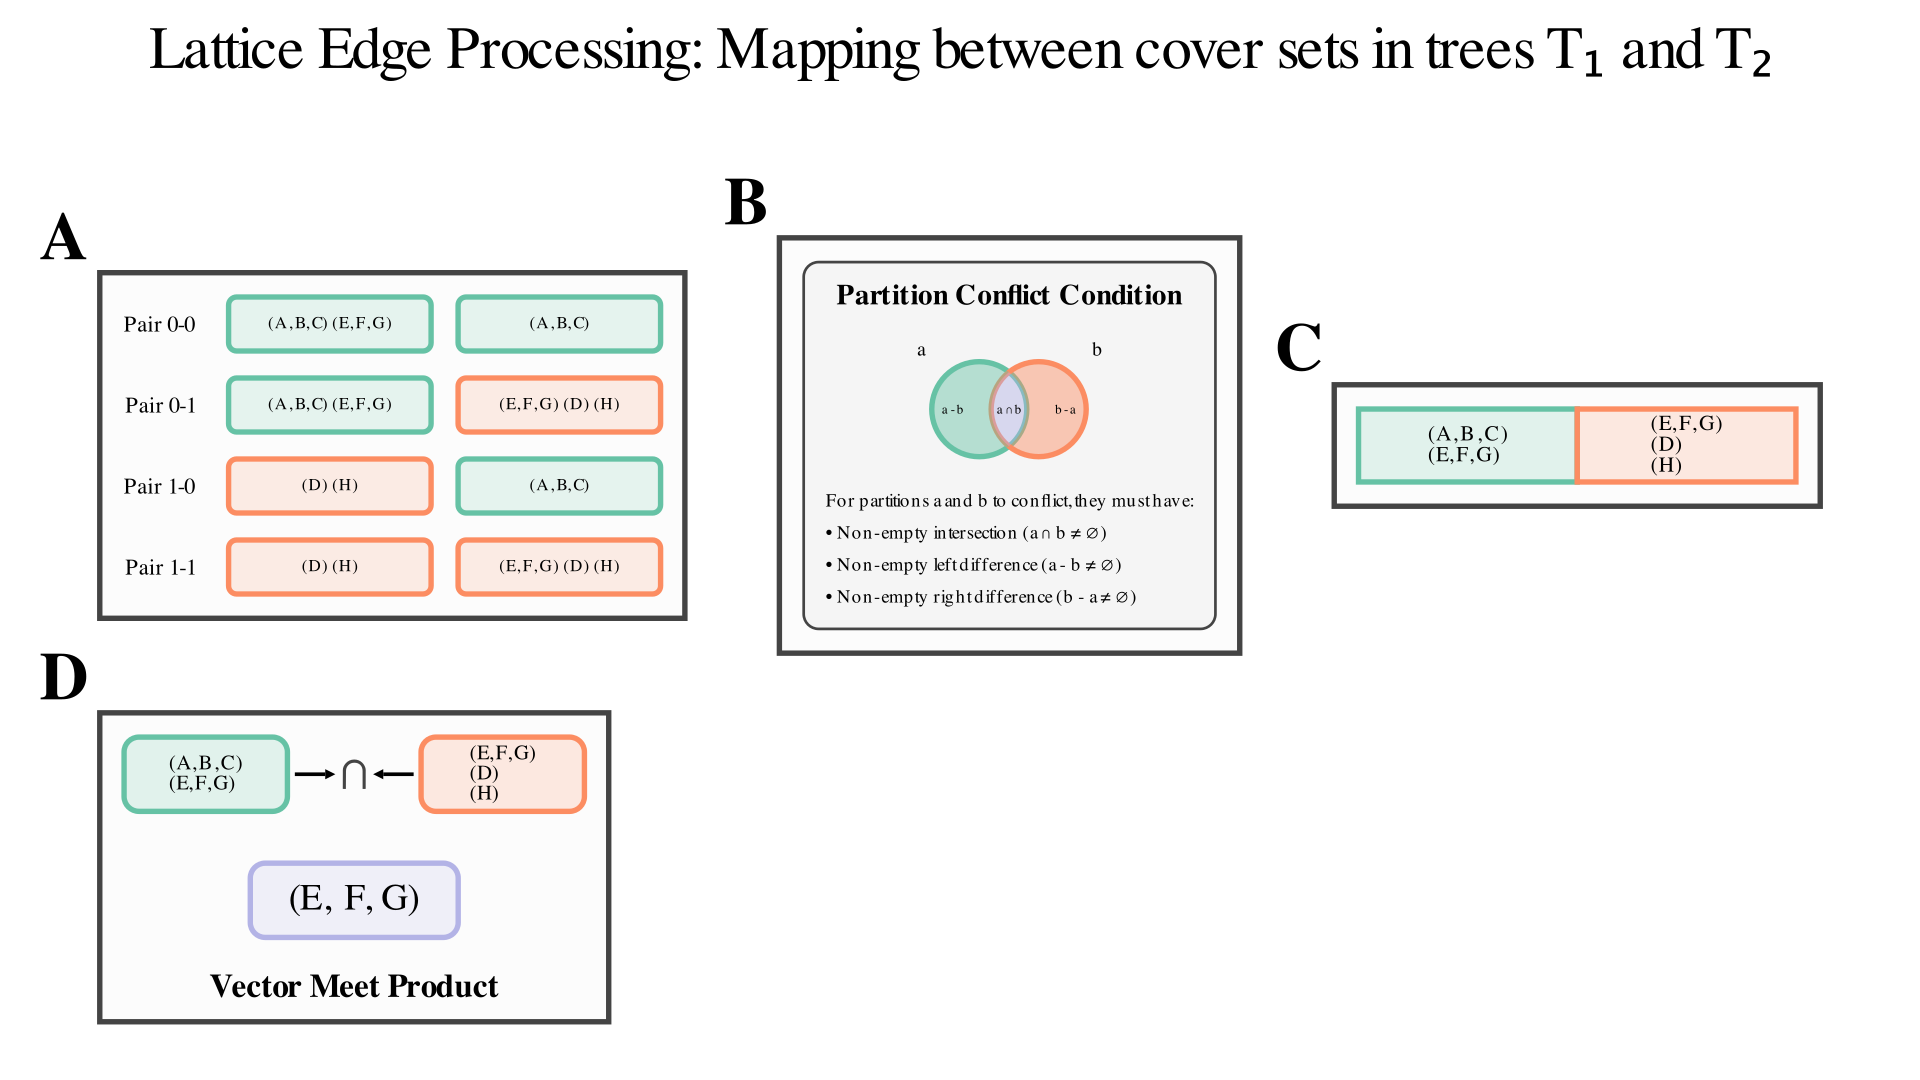

In [8]:
%%manim -pqh -o lattice_edge_processing_scene LatticeEdgeProcessingScene 


class LatticeEdgeProcessingScene(Scene):
    def construct(self):
        from brancharchitect.jumping_taxa.lattice.lattice_construction import (
            construct_sub_lattices,
            build_partition_conflict_matrix,
        )

        self.camera.background_color = WHITE

        lattice = construct_sub_lattices(t1, t2)
        edge = lattice[0]
        candidate_matrix = build_partition_conflict_matrix(edge)
        str_candiate_matrix = [[str(val) for val in row] for row in candidate_matrix]

        # Scale up panels for better use of space
        pair_boxes = self.draw_partition_pair(
            edge.t1_common_covers,
            edge.t2_common_covers,
            {0: "#66c2a5", 1: "#fc8d62"},
        ).scale(0.50)  # Increased from 0.45

        conflict_diagram = self.create_partition_conflict_diagram().scale(0.55)
        matrix_group = self.draw_matrix(
            str_candiate_matrix,
            highlight_row=0,
            column_colors=["#66c2a5", "#fc8d62"],
        ).scale(0.60)
        determinant = self.create_vector_meet_product_viz(
            scale_factor=0.55,  # Increased from 0.60
            set_a=str_candiate_matrix[0][0],
            set_b=str_candiate_matrix[0][1],
            meet_result=str(
                candidate_matrix[0][0].intersection(candidate_matrix[0][1])
            ),
            position=ORIGIN,
        )

        # Add backgrounds
        def add_bg(mobj, color="#F5F5F5"):
            rect = SurroundingRectangle(
                mobj,
                color=GRAY_D,
                fill_color=color,
                fill_opacity=0.25,
                buff=0.18,  # Reduced buff
            )
            return VGroup(rect, mobj)

        pair_boxes_group = add_bg(pair_boxes)
        conflict_diagram_group = add_bg(conflict_diagram)
        matrix_group_bg = add_bg(matrix_group)
        determinant_group = add_bg(determinant)

        # Arrange first row horizontally with less space
        row1 = VGroup(
            pair_boxes_group, conflict_diagram_group, matrix_group_bg
        ).arrange(RIGHT, buff=0.7)  # Reduced from 1.2
        row1.move_to(UP * 0.7)  # Lowered from UP * 1.2

        # Place determinant below, left-aligned with pair_boxes_group
        determinant_group.next_to(pair_boxes_group, DOWN, buff=0.7)  # Reduced from 1.2
        determinant_group.align_to(pair_boxes_group, LEFT)

        # Add figure labels (no change)
        label_A = Text("A", font_size=36, color=BLACK, weight=BOLD).next_to(
            pair_boxes_group, UP + LEFT, buff=0.10
        )
        label_B = Text("B", font_size=36, color=BLACK, weight=BOLD).next_to(
            conflict_diagram_group, UP + LEFT, buff=0.10
        )
        label_C = Text("C", font_size=36, color=BLACK, weight=BOLD).next_to(
            matrix_group_bg, UP + LEFT, buff=0.10
        )
        label_D = Text("D", font_size=36, color=BLACK, weight=BOLD).next_to(
            determinant_group, UP + LEFT, buff=0.10
        )

        # Title
        title = Text(
            "Lattice Edge Processing: Mapping between cover sets in trees T₁ and T₂",
            font_size=32,  # Slightly larger
            color=BLACK,
        ).to_edge(UP, buff=0.2)

        # Add all to scene
        self.add(
            title,
            row1,
            determinant_group,
            label_A,
            label_B,
            label_C,
            label_D,
        )

    # ─────────────────────────────────────────────────────────────────────────
    # Methods for partition conflict diagram
    # ─────────────────────────────────────────────────────────────────────────
    def create_partition_conflict_diagram(self):
        PRIMARY_BLUE = BLUE_E
        PRIMARY_ORANGE = ORANGE
        PRIMARY_GREEN = GREEN_E

        # Create title for the diagram
        diagram_title = Text(
            "Partition Conflict Condition", font_size=28, weight=BOLD, color=BLACK
        )

        # Create the main partition conflict condition visualization
        conflict_row = self.create_conflict_venn_diagram()

        # Create caption
        conflict_caption = Text(
            "For partitions a and b to conflict, they must have:\n"
            "• Non-empty intersection (a ∩ b ≠ ∅)\n"
            "• Non-empty left difference (a - b ≠ ∅)\n"
            "• Non-empty right difference (b - a ≠ ∅)",
            font_size=18,
            color=BLACK,
            line_spacing=1.3,
        )

        # Arrange the caption below the diagram
        conflict_group = VGroup(conflict_row, conflict_caption).arrange(DOWN, buff=0.5)

        # Create full diagram with title
        full_diagram = VGroup(diagram_title, conflict_group).arrange(DOWN, buff=0.5)

        # Add containing rectangle
        bg_rect = SurroundingRectangle(
            full_diagram,
            color=GRAY_D,
            buff=0.3,
            stroke_width=2,
            fill_color=LIGHT_GRAY,
            fill_opacity=0.1,
            corner_radius=0.2,
        )

        return VGroup(bg_rect, full_diagram)

    def create_conflict_venn_diagram(self):
        """Create a Venn diagram illustrating the partition conflict condition."""
        # Use legend colors
        T1_COLOR = "#66c2a5"  # Teal
        T2_COLOR = "#fc8d62"  # Orange
        INTERSECTION_COLOR = "#b3b3e6"  # Soft purple for intersection

        # Create two overlapping circles
        a = (
            Circle(radius=0.8)
            .shift(LEFT * 0.5)
            .set_stroke(T1_COLOR)
            .set_fill(opacity=0)
        )
        b = (
            Circle(radius=0.8)
            .shift(RIGHT * 0.5)
            .set_stroke(T2_COLOR)
            .set_fill(opacity=0)
        )

        # Create the intersection area
        intersection = Intersection(a.copy(), b.copy())
        intersection.set_fill(INTERSECTION_COLOR, 0.45).set_stroke(width=0)

        # Create the difference areas
        a_diff = (
            Difference(a.copy(), b.copy()).set_fill(T1_COLOR, 0.45).set_stroke(width=0)
        )
        b_diff = (
            Difference(b.copy(), a.copy()).set_fill(T2_COLOR, 0.45).set_stroke(width=0)
        )

        # Add labels
        label_a = Text("a", font_size=24, color=BLACK).next_to(a, UP + LEFT, buff=0.1)
        label_b = Text("b", font_size=24, color=BLACK).next_to(b, UP + RIGHT, buff=0.1)

        # Add region labels
        label_intersection = Text("a ∩ b", font_size=16, color=BLACK)
        label_intersection.move_to(intersection.get_center())

        label_a_diff = Text("a - b", font_size=16, color=BLACK)
        label_a_diff.move_to(a_diff.get_center() + LEFT * 0.3)

        label_b_diff = Text("b - a", font_size=16, color=BLACK)
        label_b_diff.move_to(b_diff.get_center() + RIGHT * 0.3)

        # Group Venn diagram elements
        venn_group = VGroup(
            a,
            b,
            intersection,
            a_diff,
            b_diff,
            label_a,
            label_b,
            label_intersection,
            label_a_diff,
            label_b_diff,
        ).scale(0.8)

        return venn_group

    # ─────────────────────────────────────────────────────────────────────────
    # Helper mobject builders (unchanged from original scene)
    # ─────────────────────────────────────────────────────────────────────────
    def draw_partition_pair(
        self,
        pair_of_atom_sets_1,
        pair_of_atom_sets_2,
        color_map,
        *,
        spacing_x: float = 1.7,
        spacing_y: float = 1.2,
    ) -> VGroup:  # <-- Change return type to VGroup
        """
        Return a VGroup containing two columns of rounded-rectangle boxes,
        one column per tree, laid out top-down.
        """
        y = 0
        group = VGroup()  # <-- Use VGroup instead of Group
        for i, left_set in enumerate(pair_of_atom_sets_1):
            for j, right_set in enumerate(pair_of_atom_sets_2):
                # Labels
                lbl_left = str(left_set).replace("\n", " ")
                lbl_right = str(right_set).replace("\n", " ")

                # Colours
                col_left = color_map.get(i, GRAY)
                col_right = color_map.get(j, GRAY)

                # Boxes
                box_left = self.draw_partition_box(
                    lbl_left, (-spacing_x, y, 0), col_left
                )
                box_right = self.draw_partition_box(
                    lbl_right, (spacing_x, y, 0), col_right
                )

                # Pair tag
                tag = Text(f"Pair {i}-{j}", font_size=24, color=BLACK)
                tag.next_to(box_left, LEFT, buff=0.5)

                group.add(tag, box_left, box_right)
                y -= spacing_y
        return group

    def draw_partition_box(self, label: str, pos, color) -> VGroup:
        text = Text(label, font_size=18, color=BLACK)
        bg = RoundedRectangle(
            width=3,
            height=0.8,
            corner_radius=0.12,
            stroke_color=color,
            fill_color=color,
            fill_opacity=0.15,
        )
        return VGroup(bg, text).move_to(pos)

    def draw_matrix(
        self,
        entries,
        *,
        cell_w: float = 2.7,
        cell_h: float = 0.9,
        highlight_row: int = None,
        column_colors: list = None,  # New argument
    ) -> VGroup:
        rows, cols = len(entries), len(entries[0])
        matrix = VGroup()
        top_left = UP * ((rows - 1) * cell_h / 2) + LEFT * ((cols - 1) * cell_w / 2)

        for r in range(rows):
            for c in range(cols):
                cell_text = Text(entries[r][c], font_size=19, color=BLACK)
                # Determine color for this column
                col_color = (
                    column_colors[c]
                    if column_colors and c < len(column_colors)
                    else BLACK
                )
                if highlight_row is not None and r == highlight_row:
                    cell_bg = Rectangle(
                        width=cell_w,
                        height=cell_h,
                        stroke_color=col_color,
                        stroke_width=4,
                        fill_color=col_color,
                        fill_opacity=0.18,
                    )
                else:
                    cell_bg = Rectangle(
                        width=cell_w,
                        height=cell_h,
                        stroke_color=col_color,
                        stroke_width=2,
                        fill_color=WHITE,
                        fill_opacity=0.8,
                    )
                matrix.add(
                    VGroup(cell_bg, cell_text).move_to(
                        top_left + RIGHT * c * cell_w + DOWN * r * cell_h
                    )
                )
        return matrix

    def create_vector_meet_product_viz(
        self,
        set_a="A",
        set_b="B",
        meet_result="{A ∩ B}",
        result_point="e",
        position=ORIGIN,
        scale_factor=0.8,
    ):
        # Colors
        a_color = "#66c2a5"  # T1: teal
        b_color = "#fc8d62"  # T2: orange
        meet_color = "#b3b3e6"  # Use the same intersection color as in the Venn diagram
        op_color = "#444444"
        point_color = "#222222"

        # Draw A and B as rectangles
        box_a = RoundedRectangle(
            width=2.2,
            height=1,
            corner_radius=0.2,
            color=a_color,
            fill_color=a_color,
            fill_opacity=0.18,
        )
        box_b = RoundedRectangle(
            width=2.2,
            height=1,
            corner_radius=0.2,
            color=b_color,
            fill_color=b_color,
            fill_opacity=0.18,
        )
        box_a.move_to(LEFT * 2)
        box_b.move_to(RIGHT * 2)

        label_a = Text(set_a, font_size=20, color=BLACK).move_to(box_a.get_center())
        label_b = Text(set_b, font_size=20, color=BLACK).move_to(box_b.get_center())

        # Intersection operator
        meet_op = Text("∩", font_size=60, color=op_color).move_to(ORIGIN)

        # Arrow from A and B to meet
        arrow_a = Arrow(box_a.get_right(), meet_op.get_left(), buff=0.1, color=BLACK)
        arrow_b = Arrow(box_b.get_left(), meet_op.get_right(), buff=0.1, color=BLACK)

        # Meet result box below
        meet_box = RoundedRectangle(
            width=2.8,
            height=1,
            corner_radius=0.2,
            color=meet_color,
            fill_color=meet_color,
            fill_opacity=0.18,
        )
        meet_box.next_to(meet_op, DOWN, buff=1.0)
        meet_label = Text(meet_result, font_size=36, color=BLACK).move_to(
            meet_box.get_center()
        )

        # "Meet Product" label
        meet_title = Text("Vector Meet Product", font_size=32, color=BLACK, weight=BOLD)
        meet_title.next_to(meet_box, DOWN, buff=0.5)

        # Group all together
        result = VGroup(
            box_a,
            label_a,
            box_b,
            label_b,
            meet_op,
            arrow_a,
            arrow_b,
            meet_box,
            meet_label,
            meet_title,
        )
        result.scale(scale_factor).move_to(position)
        return result
    
output_str_d = f"{output_dir}/lattice_edge_processing_scene.png"

import shutil

# Path to the Manim-generated file
manim_output_file = "/Users/berksakalli/Projects/BranchArchitect/notebooks/paper_plots/media/images/paper_plots/lattice_edge_processing_scene.png"
# Make sure output directory exists
output_dir = os.path.expanduser("~/Documents/Reports/final_phylo_movies/figures")
os.makedirs(output_dir, exist_ok=True)
# Target path (where we want to copy the file)
target_path = os.path.join(output_dir, "lattice_edge_processing_scene.png")
# Copy the file (use shutil.move if you want to move instead of copy)
if os.path.exists(manim_output_file):
    shutil.copy(manim_output_file, target_path)
    print(f"Copied Manim output to: {target_path}")
    # Update the output_str_d variable to point to the new location
    output_str_d = target_path
else:
    print(f"Warning: Manim output file not found at {manim_output_file}")

In [ ]:

import os
import tempfile
import sys
from reportlab.platypus import (
    SimpleDocTemplate,
    Paragraph,
    Spacer,
    Image,
    HRFlowable,
)
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.enums import TA_LEFT
from reportlab.lib.units import cm
from reportlab.lib.pagesizes import A4, portrait
from reportlab.lib import colors
from reportlab.graphics.shapes import Drawing, Rect, String
from reportlab.lib.colors import HexColor

# Add this near your other imports
from PIL import Image as PILImage  # Import PIL Image separately

# --- Dependency Handling ---
from pdf2image import convert_from_path

DEFAULT_POPPLER_PATH = None  # User should provide if not in PATH
# --- Configuration Constants (Adjust as needed) ---
IMAGE_DPI = 300  # Increased DPI for potentially better quality
PAGE_MARGIN = 1.2 * cm
MAIN_SECTION_SPACING = 0.8 * cm  # Increased spacing between figure sections
TITLE_IMAGE_SPACING = 0.2 * cm
IMAGE_DESC_SPACING = 0.2 * cm  # Increased spacing between image and description
HR_LINE_COLOR = colors.lightgrey
SEQUENCE_IMG_WIDTH_FACTOR = 0.90  # Increased width factor for main figures
TITLE_FONT_NAME = "Helvetica-Bold"
TITLE_FONT_SIZE = 11
BODY_FONT_NAME = "Times-Roman"
BODY_FONT_SIZE = 10  # Slightly larger body text
ERROR_TEXT_COLOR = HexColor("#e41a1c")
LEGEND_ROW_HEIGHT = 0.5 * cm
LEGEND_VERTICAL_PADDING = 0.1 * cm
LEGEND_X_START_FACTOR = 0.0
LEGEND_SWATCH_WIDTH = 15
LEGEND_SWATCH_HEIGHT = 8  # Slightly taller swatch
LEGEND_TEXT_OFFSET_X = 5  # Slightly more offset
LEGEND_FONT_NAME = "Helvetica"
LEGEND_FONT_SIZE = 7  # Slightly larger legend text
LEGEND_TEXT_COLOR = colors.black

# --- Define COLOR_LEGEND_ITEMS relevant to this plot ---
COLOR_LEGEND_ITEMS = [
    (HexColor("#e41a1c"), "Common Split (Adjacent Highlight)"),  # Red Highlight
    (
        HexColor("#66c2a5"),
        "Unique Adjacent Split / Atom (T1)",
    ),  # Teal Highlight / Enclosure Fill
    (
        HexColor("#fc8d62"),
        "Unique Adjacent Split / Atom (T2)",
    ),  # Orange Highlight / Enclosure Fill
    (
        HexColor("#377eb8"),
        "Other Unique Split (T1)",
    ),  # Blue Highlight (if used distinctly)
]


def setup_reportlab_doc(output_filename):
    """Creates and configures a ReportLab SimpleDocTemplate."""
    doc = SimpleDocTemplate(
        output_filename,
        pagesize=portrait(A4),
        leftMargin=PAGE_MARGIN,
        rightMargin=PAGE_MARGIN,
        topMargin=PAGE_MARGIN,
        bottomMargin=PAGE_MARGIN,
    )
    styles = getSampleStyleSheet()
    return doc, styles


def define_text_styles(styles):
    """Defines and returns custom text styles."""
    style_title = styles["h3"]
    style_title.fontName = TITLE_FONT_NAME
    style_title.fontSize = TITLE_FONT_SIZE
    style_title.alignment = TA_LEFT
    style_title.spaceAfter = TITLE_IMAGE_SPACING

    style_body = styles["BodyText"]
    style_body.fontName = BODY_FONT_NAME
    style_body.fontSize = BODY_FONT_SIZE
    style_body.alignment = TA_LEFT
    style_body.spaceAfter = MAIN_SECTION_SPACING

    style_error = styles["Code"]
    style_error.textColor = ERROR_TEXT_COLOR
    style_error.fontSize = BODY_FONT_SIZE

    return style_title, style_body, style_error


def convert_pdf_page_to_image(pdf_path, page_num, temp_dir, dpi, poppler_path):
    """Converts a specific page of a PDF to a PNG image using pdf2image."""
    try:
        images = convert_from_path(
            pdf_path,
            dpi=dpi,
            output_folder=temp_dir,
            fmt="png",
            poppler_path=poppler_path,
            thread_count=2,
            first_page=page_num,
            last_page=page_num,
        )
        if not images:
            raise RuntimeError(f"pdf2image returned empty list for page {page_num}")
        return images[0]
    except Exception as e:
        print(
            f"  ERROR converting page {page_num} of '{os.path.basename(pdf_path)}': {e}",
            file=sys.stderr,
        )
        return None


def create_reportlab_image_flowable(img_pil, key, available_width, error_style):
    """Creates a ReportLab Image or error Paragraph flowable with scaling."""
    if img_pil is None:
        return Paragraph(f"[Image conversion failed for '{key}']", error_style)

    temp_img_path = img_pil.filename
    try:
        img_width_px, img_height_px = img_pil.size
        if img_width_px <= 0 or img_height_px <= 0:
            raise ValueError("Image dimensions are zero or negative")
        aspect = img_height_px / float(img_width_px)

        # Apply consistent scaling factor for all figures
        scale_factor = SEQUENCE_IMG_WIDTH_FACTOR  # Use 0.95 for all

        img_reportlab_width = available_width * scale_factor
        img_reportlab_height = img_reportlab_width * aspect
        print(
            f"  Scaling '{key}' image to {scale_factor * 100:.0f}% width ({img_reportlab_width:.1f} points)"
        )

        img_flowable = Image(
            temp_img_path, width=img_reportlab_width, height=img_reportlab_height
        )
        img_flowable.hAlign = "CENTER"
        return img_flowable

    except Exception as e:
        print(
            f"  ERROR processing image data for '{key}' from '{os.path.basename(temp_img_path)}': {e}",
            file=sys.stderr,
        )
        return Paragraph(f"[Error processing image data for '{key}']", error_style)


def create_color_legend_drawing(width):
    """Creates the ReportLab Graphics Drawing object for the color legend (vertical)."""
    num_items = len(COLOR_LEGEND_ITEMS)
    if num_items == 0:
        return Drawing(width, 0)

    total_legend_height = (LEGEND_ROW_HEIGHT * num_items) + (
        LEGEND_VERTICAL_PADDING * 2
    )
    d = Drawing(width, total_legend_height)

    current_y = total_legend_height - LEGEND_VERTICAL_PADDING - (LEGEND_ROW_HEIGHT / 2)
    legend_x = width * LEGEND_X_START_FACTOR

    for item_color, item_text in COLOR_LEGEND_ITEMS:
        swatch_y = current_y - LEGEND_SWATCH_HEIGHT / 2
        swatch = Rect(
            legend_x,
            swatch_y,
            LEGEND_SWATCH_WIDTH,
            LEGEND_SWATCH_HEIGHT,
            fillColor=item_color,
            strokeColor=colors.black,
            strokeWidth=0.5,
        )
        d.add(swatch)

        text_x = legend_x + LEGEND_SWATCH_WIDTH + LEGEND_TEXT_OFFSET_X
        text_y = swatch_y + (LEGEND_SWATCH_HEIGHT / 2) - (LEGEND_FONT_SIZE * 0.35)
        legend_string = String(text_x, text_y, item_text)
        legend_string.fontName = LEGEND_FONT_NAME
        legend_string.fontSize = LEGEND_FONT_SIZE
        legend_string.fillColor = LEGEND_TEXT_COLOR
        legend_string.textAnchor = "start"
        d.add(legend_string)

        current_y -= LEGEND_ROW_HEIGHT
    return d


# --- Story Building Functions ---


def _add_legend_section(story, available_width):
    """Adds the color legend to the story."""
    print("  Creating color legend drawing...")
    color_legend_drawing = create_color_legend_drawing(available_width)
    if color_legend_drawing.height > 0:
        story.append(color_legend_drawing)
        story.append(Spacer(1, MAIN_SECTION_SPACING))


def _add_figure_section(story, image_flowables, key, title, description, styles):
    """Adds a generic figure section (Title, Image, Description) to the story."""
    style_title, style_body, style_error = styles
    story.append(Paragraph(title, style_title))
    if key in image_flowables:
        story.append(image_flowables[key])
        story.append(Spacer(1, IMAGE_DESC_SPACING))
    else:
        story.append(Paragraph(f"[Image '{key}' not available]", style_error))
        story.append(Spacer(1, IMAGE_DESC_SPACING))
    story.append(Paragraph(description, style_body))


def build_reportlab_story(
    image_flowables, fig_titles, fig_descriptions, styles, available_width
):
    """Constructs the ReportLab story list based on available figures."""
    story = []
    all_styles = define_text_styles(styles)
    num_figures = len(fig_titles)

    _add_legend_section(story, available_width)
    if story and isinstance(story[-1], Spacer):
        story.append(
            HRFlowable(
                width="100%",
                thickness=0.5,
                color=HR_LINE_COLOR,
                spaceBefore=0.1 * cm,
                spaceAfter=MAIN_SECTION_SPACING,
            )
        )

    # Single loop to add all figures using generic keys
    for i in range(num_figures):
        # Generate the key like "figure_A", "figure_B", etc.
        key = f"figure_{chr(ord('A') + i)}"
        if key in image_flowables:
            title = (
                fig_titles[i] or f"Figure {chr(ord('A') + i)}"
            )  # Use provided title or default
            description = fig_descriptions[i] or ""  # Use provided description
            _add_figure_section(
                story, image_flowables, key, title, description, all_styles
            )

            # Add horizontal line between figures if not the last one
            if i < num_figures - 1:
                story.append(
                    HRFlowable(
                        width="100%",
                        thickness=0.5,
                        color=HR_LINE_COLOR,
                        spaceBefore=0.1 * cm,
                        spaceAfter=MAIN_SECTION_SPACING,
                    )
                )
        else:
            # Handle case where image flowable wasn't created (e.g., file missing)
            print(
                f"Warning: Image flowable for key '{key}' not found. Skipping section.",
                file=sys.stderr,
            )
            # Optionally add a placeholder paragraph
            story.append(
                Paragraph(
                    f"[Figure {chr(ord('A') + i)} - Image Missing]", all_styles[2]
                )
            )  # Use error style
            if i < num_figures - 1:
                story.append(
                    HRFlowable(
                        width="100%",
                        thickness=0.5,
                        color=HR_LINE_COLOR,
                        spaceBefore=0.1 * cm,
                        spaceAfter=MAIN_SECTION_SPACING,
                    )
                )
    return story


# --- Main Orchestration Function ---
def create_vertical_composite_pdf(
    figure_files, output_filename, fig_titles, fig_descriptions, poppler_path=None
):
    """Creates a composite PDF figure with color legend, images, and descriptions."""
    num_figures = len(figure_files)
    if not (num_figures == len(fig_titles) == len(fig_descriptions)):
        print(
            "Error: Number of input PDF files, titles, and descriptions must match.",
            file=sys.stderr,
        )
        return False
    if num_figures == 0:
        print("Error: No input files provided.", file=sys.stderr)
        return False

    doc, styles = setup_reportlab_doc(output_filename)
    _, _, style_error = define_text_styles(styles)
    image_flowables = {}
    missing_files = []

    # Always use generic keys like "figure_A", "figure_B", ...
    keys = [f"figure_{chr(ord('A') + i)}" for i in range(num_figures)]
    print(f"  Assigning keys: {keys}")

    print(
        f"--- Starting Vertical Composite PDF Generation: '{output_filename}' ({num_figures} figures) ---"
    )
    actual_poppler_path = poppler_path or DEFAULT_POPPLER_PATH

    try:
        with tempfile.TemporaryDirectory() as temp_dir:
            print(f"  Using temporary directory: {temp_dir}")

            # Process each input file
            for i, filename in enumerate(figure_files):
                key = keys[i]
                print(
                    f"\nProcessing: Figure {chr(ord('A') + i)} ('{os.path.basename(filename)}') as '{key}'"
                )

                if not os.path.exists(filename):
                    print(f"  ERROR: File not found: {filename}", file=sys.stderr)
                    missing_files.append(filename)
                    image_flowables[key] = Paragraph(
                        f"[Missing image: {os.path.basename(filename)}] ({key})",
                        style_error,
                    )
                    continue

                # Check if file is PNG or PDF
                file_ext = os.path.splitext(filename)[1].lower()

                # For PNG files, load directly with PIL
                if file_ext == ".png":
                    try:
                        # Open the PNG with PIL
                        print(f"  Opening PNG file: {filename}")
                        img_pil = PILImage.open(filename)

                        # Save a copy in the temp directory with explicit format
                        temp_img_path = os.path.join(
                            temp_dir, f"temp_{os.path.basename(filename)}"
                        )
                        print(f"  Saving temp copy to: {temp_img_path}")

                        # Force to RGB mode if RGBA to avoid transparency issues
                        if img_pil.mode == "RGBA":
                            print("  Converting RGBA image to RGB")
                            rgb_img = PILImage.new("RGB", img_pil.size, (255, 255, 255))
                            rgb_img.paste(
                                img_pil, mask=img_pil.split()[3]
                            )  # Use alpha as mask
                            img_pil = rgb_img

                        img_pil.save(temp_img_path, format="PNG")
                        img_pil.filename = temp_img_path

                        # Verify the saved file exists
                        if not os.path.exists(temp_img_path):
                            raise FileNotFoundError(
                                f"Failed to save temporary image to {temp_img_path}"
                            )

                        print(f"  Successfully processed PNG: {img_pil.size}")
                    except Exception as e:
                        print(
                            f"  ERROR: Failed to process PNG file {filename}: {e}",
                            file=sys.stderr,
                        )
                        import traceback

                        traceback.print_exc()
                        img_pil = None
                else:
                    # For PDF files, use the existing conversion function
                    img_pil = convert_pdf_page_to_image(
                        filename, 1, temp_dir, IMAGE_DPI, actual_poppler_path
                    )

                # Continue with creating the flowable
                image_flowables[key] = create_reportlab_image_flowable(
                    img_pil, key, doc.width, style_error
                )

            # After all files are processed, build the story and PDF
            print("\nBuilding final PDF document...")
            story = build_reportlab_story(
                image_flowables, fig_titles, fig_descriptions, styles, doc.width
            )

            try:
                doc.build(story)
                print(f"\nPDF built successfully: {output_filename}")
                return True
            except Exception as e:
                print(f"\nError building PDF: {e}", file=sys.stderr)
                import traceback

                traceback.print_exc()
                return False

    except Exception as e:
        print("\n--- PDF Generation Failed ---\n", file=sys.stderr)
        print(
            f"ERROR: Could not build ReportLab PDF '{output_filename}'.",
            file=sys.stderr,
        )
        print(f"Reason: {e}", file=sys.stderr)
        import traceback

        traceback.print_exc()
        return False


# In your main code, update these:
figure_titles = [
    "Figure A: Input Trees for Comparison",
    "Figure B: Identifying Lattice Edges",
    "Figure C: Analyzing Partition Sets (Atoms) within Lattice Edges",
    "Figure D: Lattice Edge Processing Visualization",  # Updated title for Figure D
]

figure_a_description = """
This figure presents the starting point of our tree comparison analysis, showing two phylogenetic trees, <i>T</i><sub>1</sub> and <i>T</i><sub>2</sub>, in their standard representation without any special highlighting.
Both trees contain the same taxa (labeled A through H, plus outgroups O1 and O2), but with different topological relationships between them.
At first glance, identifying the structural differences between these trees is challenging due to their complexity and the rearrangement of multiple branches.
"""

figure_b_description = """
The thick <font color="#e41a1c">red</font> branches represent split points that are identical in both trees – these form the common split (A, B, C, D, E, F, G, H | O1, O2) preserved across both phylogenetic trees.

Connected to these common splits are branches with gradient coloring (<font color="#007e5c">teal/green</font> in <i>T</i><sub>1</sub> and <font color="#D55E00">orange</font> in <i>T</i><sub>2</sub>), which represent the unique structural differences between the trees.

In <i>T</i><sub>1</sub>, the unique splits include:
<ul>
<li>The <font color="#007e5c">teal/green</font> on the left: (A, B, C, E, F, G | D, H)</li>
<li>Further divisions into <font color="#007e5c">teal/green</font> (A, B, C) and (E, F, G) groups</li>
<li>The <font color="#007e5c">teal/green</font> split: (D, H | A, B, C, E, F, G, O1, O2)</li>
</ul>

In <i>T</i><sub>2</sub>, the unique splits include:
<ul>
<li>The <font color="#D55E00">orange</font> partition: (E, F, G, D, H | A, B, C)</li>
<li>Further subdivisions into <font color="#D55E00">orange</font> (E, F, G, H | D)</li>
<li>And the split between <font color="#D55E00">orange</font> (E, F, G) | H</li>
</ul>

These connection zones – where common splits interface with unique branches – are the critical regions where tree transformation occurs during interpolation.
"""

figure_c_description = """
This figure shows how we find the conflicting partition sets. The <font color="#007e5c">teal/green</font> enclosures in <i>T</i><sub>1</sub> and <font color="#D55E00">orange</font> enclosures in <i>T</i><sub>2</sub> represent distinct partition elements that form the minimal separating sets in each structure.

Each enclosed region maps to a fundamental mathematical unit in the lattice edge's computational representation. These visual groupings—{A, B, C} and {E, F, G} in <i>T</i><sub>1</sub> versus {E, F, G} and separate single-element partitions {D} and {H} in <i>T</i><sub>2</sub>—highlight the set-theoretic differences between the graph structures.

The algorithm identifies these partition sets through set-theoretic operations that isolate topologically significant element groupings. By highlighting these abstract structural differences, we provide a direct visualization of the mathematical foundation underlying the lattice transformation process between the two structures.
"""

figure_d_description = """
Detailed visualization of the computational steps:
<ul>
<li><b>(A)</b> Partition pairs extracted from input structures,</li>
<li><b>(B)</b> Mathematical conflict condition formalized as set relationships (<i>a</i> ∩ <i>b</i> ≠ ∅, <i>a</i> − <i>b</i> ≠ ∅, <i>b</i> − <i>a</i> ≠ ∅),</li>
<li><b>(C)</b> Candidate conflict matrix with computational row highlighting, and</li>
<li><b>(D)</b> Vector meet product operation demonstrating the set intersection calculation central to determining partition conflicts in the algorithm.</li>
</ul>
"""

# --- Define titles and descriptions for the included figures ---
# Ensure these lists have the same number of elements as input_files (3 in this case)
figure_titles = [
    "Figure A: Input Trees for Comparison",
    "Figure B: Identifying Lattice Edges",
    "Figure C: Analyzing Partition Sets (Atoms) within Lattice Edges",
    "Figure D: Analyzing Partition Sets (Atoms) within Lattice Edges",
]


figure_descriptions = [
    figure_a_description,
    figure_b_description,
    # Figure C Description (Partition Sets / Atoms)
    figure_c_description,
    # Figure D Description (updated)
    figure_d_description
]

In [9]:
if __name__ == "__main__":
    if "output_dir" not in locals() and "output_dir" not in globals():
        # Define it here if necessary, but ideally it's inherited
        output_dir = os.path.expanduser(
            "~/Documents/Reports/final_phylo_movies/figures"
        )
        print(
            f"Warning: 'output_dir' not found in scope, using default: {output_dir}",
            file=sys.stderr,
        )

    base_figure_dir = output_dir  # Use the directory where the notebook saved the PDFs

    if not os.path.isdir(base_figure_dir):
        print(
            f"ERROR: Input figure directory not found: {base_figure_dir}",
            file=sys.stderr,
        )
        raise FileNotFoundError(f"Input figure directory not found: {base_figure_dir}")

    # Output directory for the composite PDF (e.g., same as script location)
    composite_output_dir = os.path.join(base_figure_dir, "composite_figures")
    os.makedirs(composite_output_dir, exist_ok=True)

    # --- Define the input PDF filenames generated by this notebook ---
    pdf1_path = output_str_a
    pdf2_path = output_str_b
    pdf3_path = output_str_c
    png_path = output_str_d

    # pdf4_path = os.path.join(output_dir_figure_d, "my_partition_viz.pdf") # Adjusted to match the output from the previous cell
    input_files = [pdf1_path, pdf2_path, pdf3_path, png_path]  # Add more if needed


    # --- Define the output filename for the composite PDF ---
    output_pdf_filename = os.path.join(
        composite_output_dir, "composite_tree_comparison.pdf"
    )

    # --- Verification ---
    print(f"Attempting to create vertical composite PDF: {output_pdf_filename}")
    print("Using input files generated by this notebook:")

    for f in input_files:
        print(f"  - {f}")

    # Check if all input files exist
    all_files_exist = True
    missing_files_list = []

    for fpath in input_files:
        if not os.path.exists(fpath):
            print(f"  ERROR: Input file not found: {fpath}", file=sys.stderr)
            missing_files_list.append(fpath)
            all_files_exist = False

    if not all_files_exist:
        print("\\nAborting PDF generation due to missing input files.", file=sys.stderr)

        raise FileNotFoundError(f"Missing input files: {', '.join(missing_files_list)}")
    else:
        print("\\nAll input files found.")

    my_poppler_path = None  # Set this if Poppler is not in system PATH

    # Ensure the function is defined (it should be from the previous cell)
    if (
        "create_vertical_composite_pdf" in locals()
        or "create_vertical_composite_pdf" in globals()
    ):
        success = create_vertical_composite_pdf(
            input_files,
            output_pdf_filename,
            figure_titles,
            figure_descriptions,
            poppler_path=my_poppler_path,
        )

        # --- Define the output filename for the composite PDF ---
        output_pdf_filename = os.path.join("./", "composite_tree_comparison.pdf")

        success = create_vertical_composite_pdf(
            input_files,
            output_pdf_filename,
            figure_titles,
            figure_descriptions,
            poppler_path=my_poppler_path,
        )

        if success:
            print(f"\\nSuccessfully created: {output_pdf_filename}")
        else:
            print(f"\\nFailed to create: {output_pdf_filename}", file=sys.stderr)
    else:
        print(
            "\\nERROR: 'create_vertical_composite_pdf' function not found.",
            file=sys.stderr,
        )

Attempting to create vertical composite PDF: /Users/berksakalli/Documents/Reports/final_phylo_movies/figures/composite_figures/composite_tree_comparison.pdf
Using input files generated by this notebook:
  - /Users/berksakalli/Documents/Reports/final_phylo_movies/figures/collect_covers.pdf
  - /Users/berksakalli/Documents/Reports/final_phylo_movies/figures/find_s_edges_tree.pdf
  - /Users/berksakalli/Documents/Reports/final_phylo_movies/figures/find_common_cover.pdf
  - /Users/berksakalli/Documents/Reports/final_phylo_movies/figures/lattice_edge_processing_scene.png
\nAll input files found.
  Assigning keys: ['figure_A', 'figure_B', 'figure_C', 'figure_D']
--- Starting Vertical Composite PDF Generation: '/Users/berksakalli/Documents/Reports/final_phylo_movies/figures/composite_figures/composite_tree_comparison.pdf' (4 figures) ---
  Using temporary directory: /var/folders/4b/d3dqt2g92wqbp31k199b7msh0000gn/T/tmpzxlmxdm5

Processing: Figure A ('collect_covers.pdf') as 'figure_A'
  Scaling